In [1]:
import pandas as pd
import numpy as np
# %matplotlib notebook 
    ## to enable interactive graphics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML

# %matplotlib notebook
# plt.interactive(False)

In [25]:
filename = 'result_pencil_lowprob.csv'
df = pd.read_csv(filename)

In [37]:
# df
# obj_id: -1 = spawned/died, 0 = recoil, 1 = scatter

# Functions

In [3]:
def imageScatter(df, elev = 30, azith = 30):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ='3d')

    plot = ax.scatter3D(df.x, df.y, df.z, c=df.E, cmap='Blues')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


    plt.colorbar(plot, ax=ax)

    #elev = 60 # elevation angle in z plane
    # azith = 120 # azimuth angle in xy plane
    ax.view_init(elev, azith)

    plt.show()

In [4]:
def videoScatter(df):
    fig = plt.figure(figsize = (10, 7))
    ax = fig.add_subplot(111, projection ='3d')

    plot, = ax.plot(df.x, df.y, df.z, 'b.', alpha = 0.2)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


    def init():
        return plot,

    def update(frame):
        ax.view_init(frame/8, frame)
        return plot,

    ani = FuncAnimation(fig, update, frames=np.linspace(0, 360, 360), init_func=init, blit=True, interval=33)
    HTML(ani.to_html5_video())

In [5]:
# only plot photon events for photons that experienced scattering
def returnScatteredPhotons(df):
    criterion = df.groupby('id').size() > 2
    toKeep = np.asarray(criterion[df['id']])
    return df[toKeep]

In [6]:
def removeSpawning(df):
    return df[~((df.x == 0) & (df.y == 0) & (df.z == 0))]

In [35]:
def connectedPathPlot(df, plotCylinder=False, coincidence=False, elev=30, azith=30):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ='3d')
    
    for photonid in df.id.unique():
        connected = df[df.id == photonid]
        
        if ((1 in connected['obj_id'].values) and (0 in connected['obj_id'].values)):# and (0 in connected['obj_id'].values)):
            plot = ax.plot(connected.x, connected.y, connected.z, color='orange', alpha=0.5)
        else:
            if not coincidence:
                plot = ax.plot(connected.x, connected.y, connected.z, color='blue', alpha=0.2)

    if plotCylinder:
        ax.scatter([0, -125], [0, 0], [350, 566], color='black')
        
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


    #elev = 60 # elevation angle in z plane
    # azith = 120 # azimuth angle in xy plane
    ax.view_init(elev, azith)

    plt.show()

# Actual plots

In [38]:
scattereddf = returnScatteredPhotons(df)
withoutSpawning = removeSpawning(scattereddf)

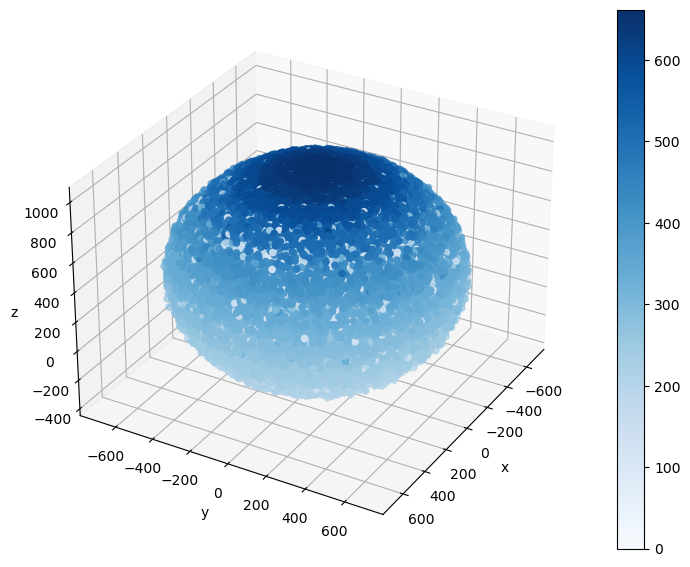

In [29]:
imageScatter(scattereddf)

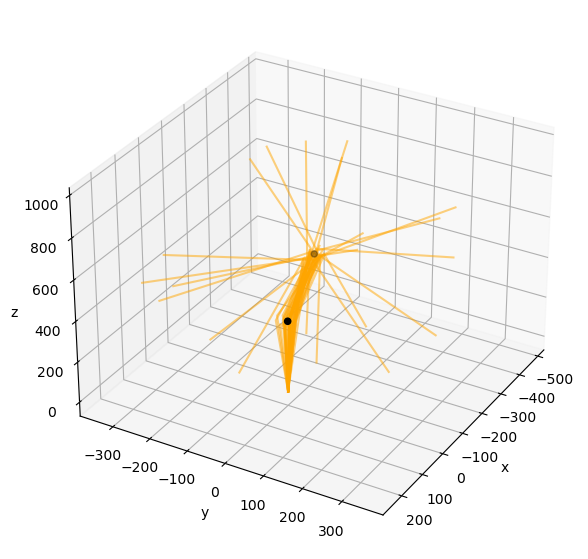

In [36]:
connectedPathPlot(scattereddf, coincidence=True, plotCylinder=True)